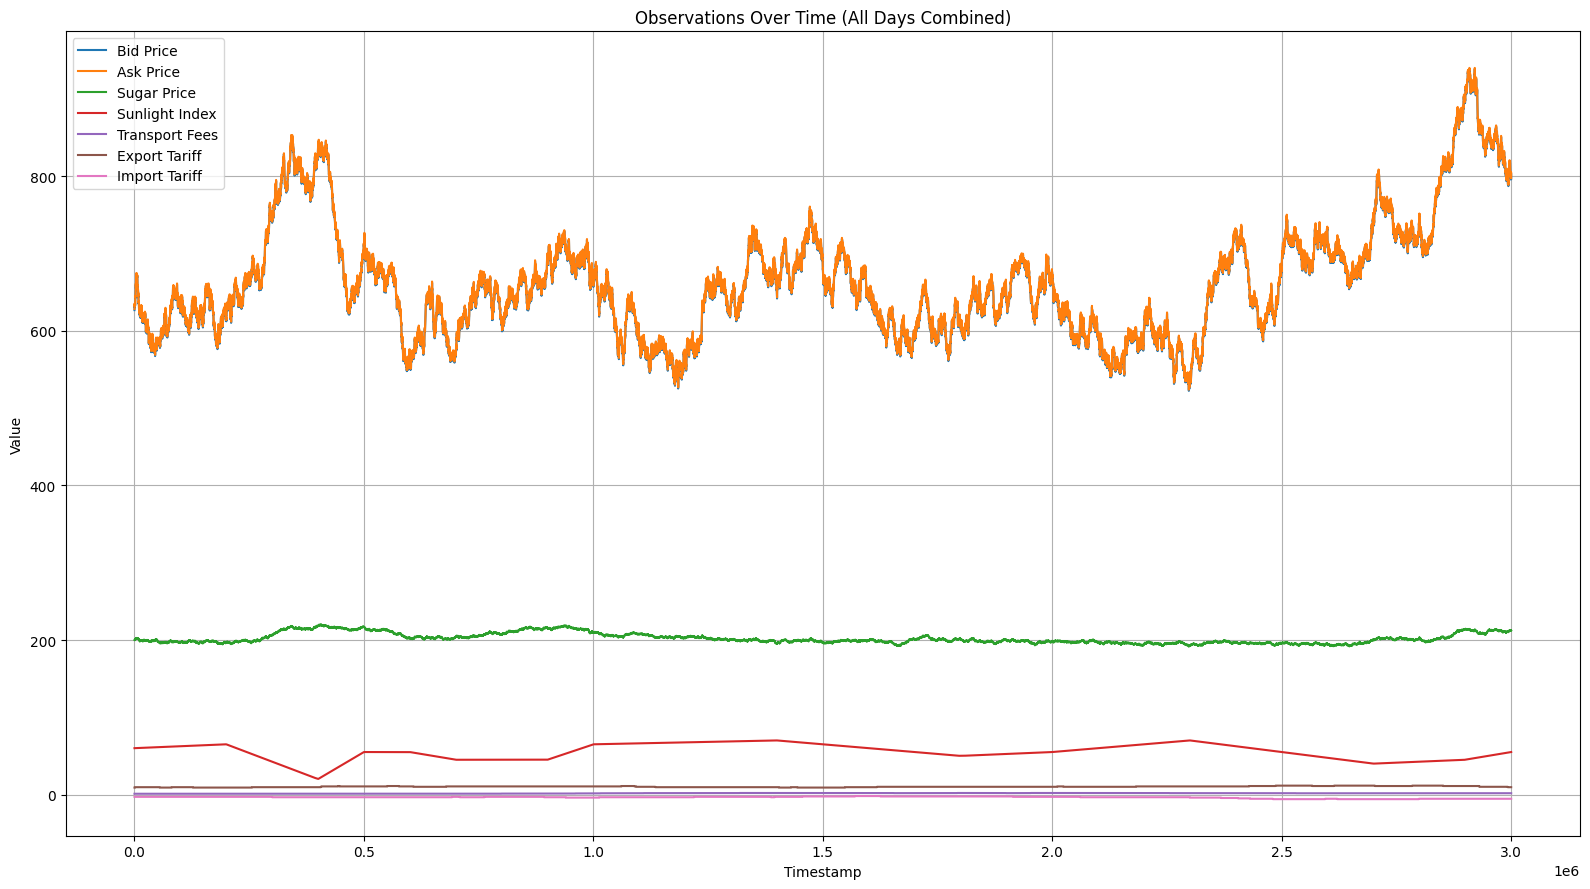

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    "round-4-island-data-bottle/observations_round_4_day_1.csv",
    "round-4-island-data-bottle/observations_round_4_day_2.csv",
    "round-4-island-data-bottle/observations_round_4_day_3.csv",
]

# Read and combine all CSV files, shifting timestamps for each day
dfs = []
for i, path in enumerate(file_paths):
    df = pd.read_csv(path)
    df['timestamp'] += i * 1_000_000  # Shift timestamps per day
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

# Plotting all relevant features
plt.figure(figsize=(16, 9))

plt.plot(data['timestamp'], data['bidPrice'], label='Bid Price')
plt.plot(data['timestamp'], data['askPrice'], label='Ask Price')
plt.plot(data['timestamp'], data['sugarPrice'], label='Sugar Price')
plt.plot(data['timestamp'], data['sunlightIndex'], label='Sunlight Index')
plt.plot(data['timestamp'], data['transportFees'], label='Transport Fees')
plt.plot(data['timestamp'], data['exportTariff'], label='Export Tariff')
plt.plot(data['timestamp'], data['importTariff'], label='Import Tariff')

plt.title("Observations Over Time (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Mid Price Model Coefficients:
  sugarPrice      × 7.8059
  sunlightIndex   × -1.6473
  transportFees   × -80.2059
  exportTariff    × -67.8066
  importTariff    × -38.3489
  Intercept:      -230.4243


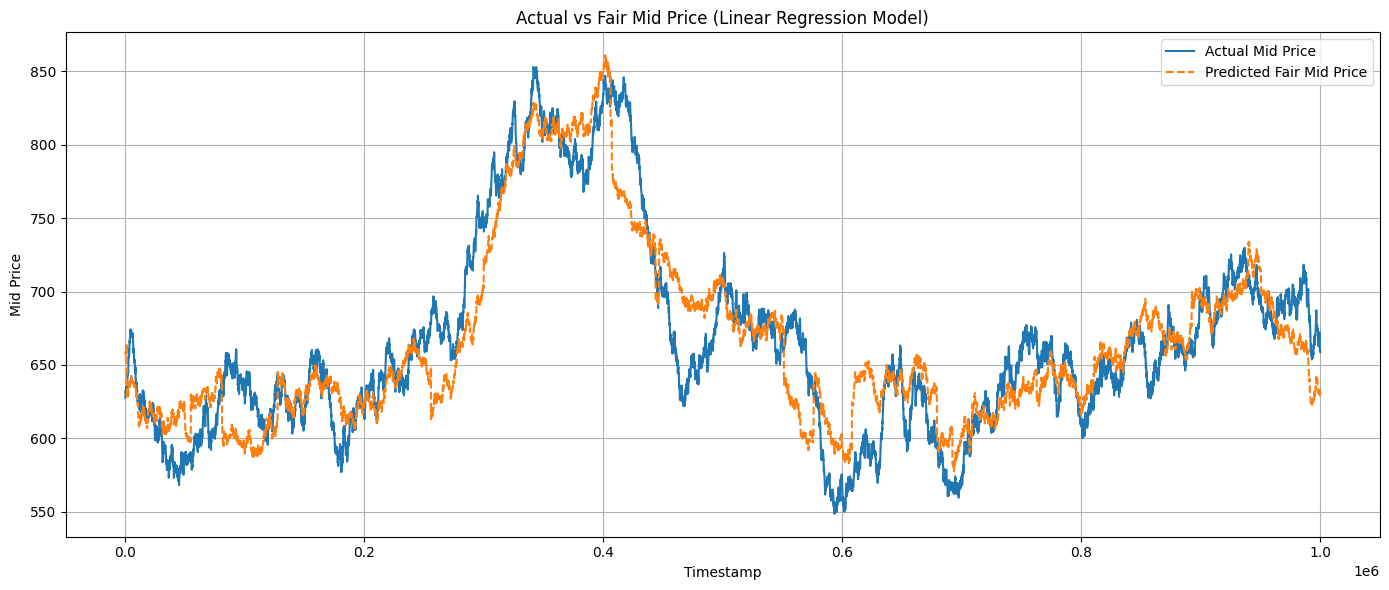

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_1.csv")

# Compute mid price
data['midPrice'] = (data['bidPrice'] + data['askPrice']) / 2

# Features
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
X = data[features]
y = data['midPrice']

# Fit linear regression model
model = LinearRegression().fit(X, y)
data['fair_mid'] = model.predict(X)

# Print coefficients
print("📈 Mid Price Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name:15s} × {coef:.4f}")
print(f"  Intercept:      {model.intercept_:.4f}")

# Plot actual vs predicted mid prices
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['midPrice'], label='Actual Mid Price')
plt.plot(data['timestamp'], data['fair_mid'], '--', label='Predicted Fair Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Actual vs Fair Mid Price (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Mid Price Model Coefficients:
  sugarPrice      × 1.7433
  sunlightIndex   × 2.8734
  transportFees   × 170.4331
  exportTariff    × 11.0071
  importTariff    × 33.1591
  Intercept:      -221.0105


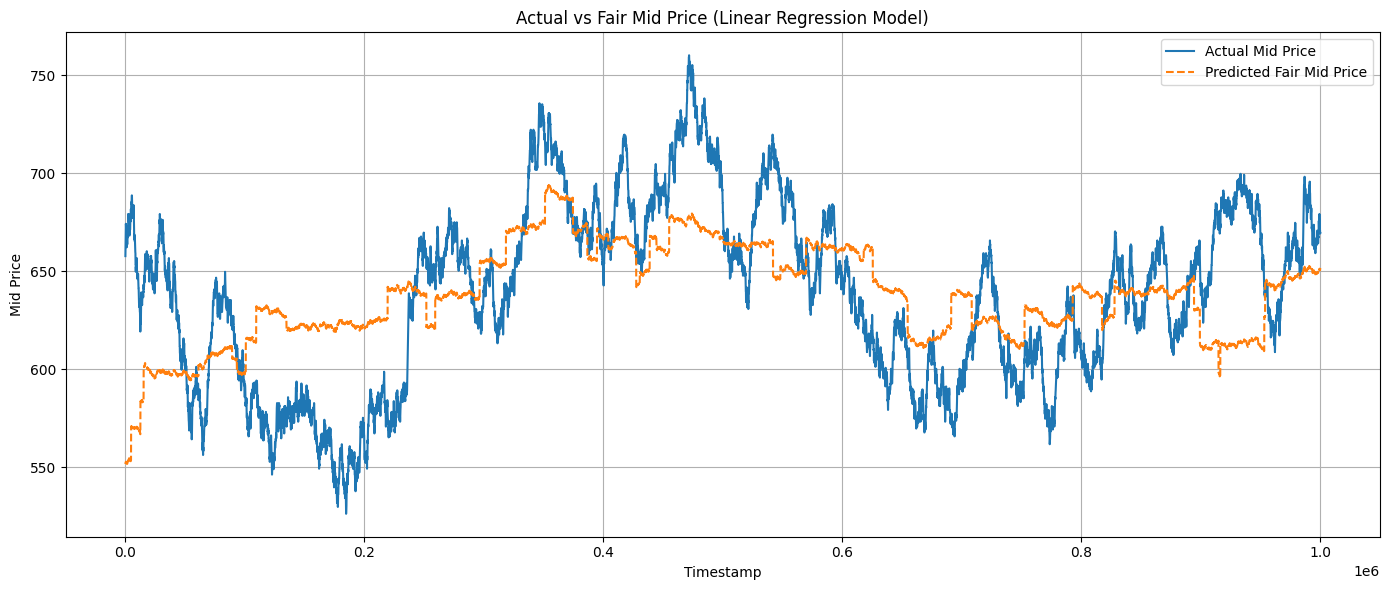

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_2.csv")

# Compute mid price
data['midPrice'] = (data['bidPrice'] + data['askPrice']) / 2

# Features
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
X = data[features]
y = data['midPrice']

# Fit linear regression model
model = LinearRegression().fit(X, y)
data['fair_mid'] = model.predict(X)

# Print coefficients
print("📈 Mid Price Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name:15s} × {coef:.4f}")
print(f"  Intercept:      {model.intercept_:.4f}")

# Plot actual vs predicted mid prices
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['midPrice'], label='Actual Mid Price')
plt.plot(data['timestamp'], data['fair_mid'], '--', label='Predicted Fair Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Actual vs Fair Mid Price (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Mid Price Model Coefficients:
  sugarPrice      × 12.6190
  sunlightIndex   × -0.7455
  transportFees   × 36.2382
  exportTariff    × 26.9168
  importTariff    × -31.1317
  Intercept:      -2286.2214


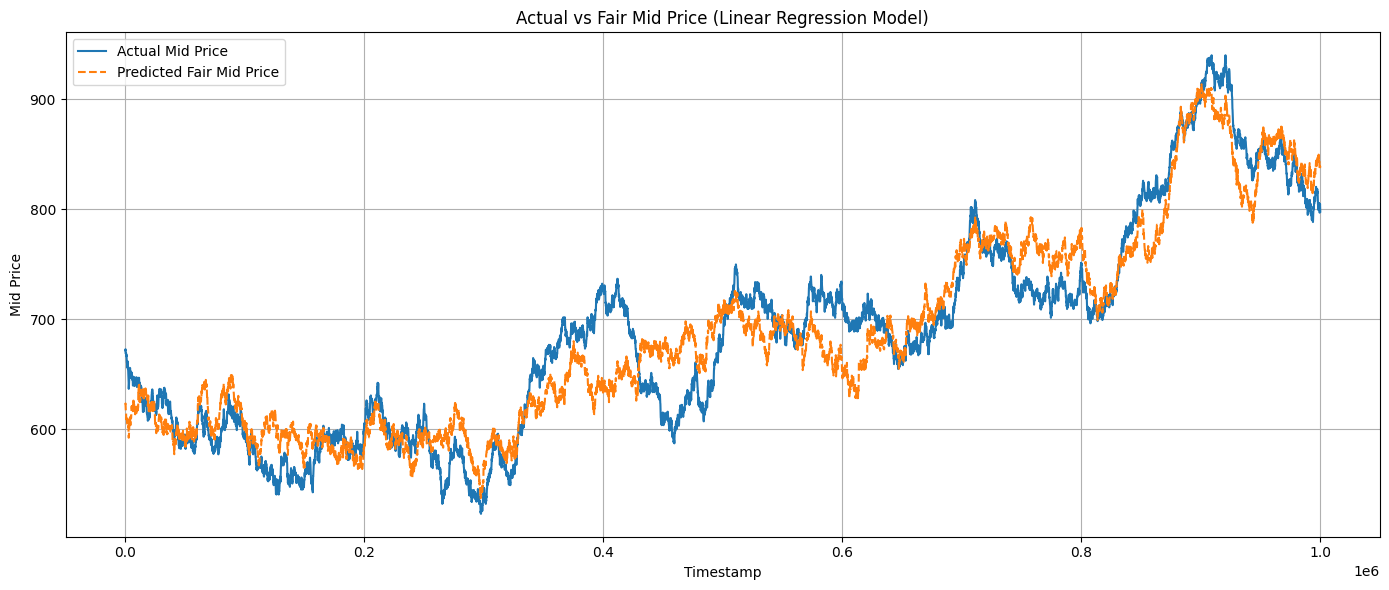

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_3.csv")

# Compute mid price
data['midPrice'] = (data['bidPrice'] + data['askPrice']) / 2

# Features
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
X = data[features]
y = data['midPrice']

# Fit linear regression model
model = LinearRegression().fit(X, y)
data['fair_mid'] = model.predict(X)

# Print coefficients
print("📈 Mid Price Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name:15s} × {coef:.4f}")
print(f"  Intercept:      {model.intercept_:.4f}")

# Plot actual vs predicted mid prices
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['midPrice'], label='Actual Mid Price')
plt.plot(data['timestamp'], data['fair_mid'], '--', label='Predicted Fair Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Actual vs Fair Mid Price (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


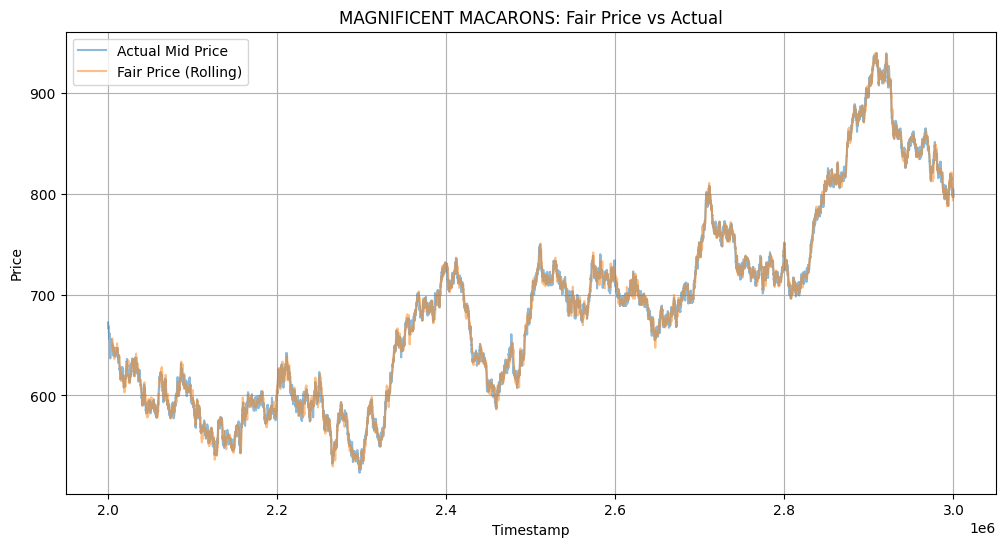

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_1.csv")
df["midPrice"] = (df["bidPrice"] + df["askPrice"]) / 2

# Feature columns
features = ["sugarPrice", "sunlightIndex", "transportFees", "exportTariff", "importTariff"]
X_raw = df[features].values
y = df["midPrice"].values

# Add intercept term (column of 1s)
X_with_intercept = np.hstack((np.ones((len(df), 1)), X_raw))

# Rolling regression
window_size = 50
fair_prices = [np.nan] * window_size

for i in range(window_size, len(df)):
    X_window = X_with_intercept[i - window_size:i]
    y_window = y[i - window_size:i]

    try:
        beta = np.linalg.pinv(X_window) @ y_window
        fair_price = X_with_intercept[i] @ beta

        if abs(fair_price - y[i]) / y[i] > 0.05:
            fair_price = np.nan
    except np.linalg.LinAlgError:
        fair_price = np.nan

    fair_prices.append(fair_price)

df["fair_price"] = fair_prices

plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["midPrice"], label="Actual Mid Price", alpha=0.5)
plt.plot(df["timestamp"], df["fair_price"], label="Fair Price (Rolling)", alpha=0.5)
plt.legend()
plt.title("MAGNIFICENT MACARONS: Fair Price vs Actual")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.grid(True)
plt.show()